# Análise de Churn - Pré-Processamento

**Churn**, também chamado de *churn rate* ou *attrition rate*, é uma métrica que mede a evasão de clientes de determinada empresa, ou seja, a taxa de cancelamento. Ou seja, caso a taxa de evasão seja alta, quer dizer que os clientes estão insatisfeitos com a empresa, e que há algum problema que deve ser tratado. Nesse caso, o notebook trata de um dataset fictício de um banco visando previsão de churns.

### O problema de negócio
O [Dataset](https://www.kaggle.com/mervetorkan/churndataset?select=churn.csv) apresenta 10.000 instâncias com dados fictícios de um banco que atua na Europa, com 14 atributos diversos acerca de clientes como nome, pontuação de crédito, salário estimado, se possui ou não cartão de crédito, entre outros, e por fim, se existiu evasão ou não por parte do cliente i.e. churn. 

A taxa média de churn é claramente variável de acordo com o porte e segmento da empresa. No caso do setor bancário, taxas de churn entre 11% a 34% podem ser encontradas [[1]](https://thefinancialbrand.com/59779/digital-banking-branch-channel-switching/). Partindo desse princípio, algumas perguntas que auxiliem a tomada de decisão podem ser realizadas, como por exemplo:

- Qual a atual taxa de churn da empresa?
- Como ela varia de acordo com os clientes (e.g. idade, se possui ou não cartão de crédito)?
- Em quais países ela é mais alta?
- Qual o gênero com maior taxa? Varia também por país?

Nesse contexto, o notebook apresenta uma análise exploratória dos dados (EDA), e pré-processamento dos mesmos, visando responder algumas perguntas acerca da taxa de evasão deste banco.

- Importar bibliotecas:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn

wn.filterwarnings('ignore')

plt.style.use('ggplot')

- Ler o dataset, mostrar as 5 primeiras linhas:

In [2]:
churn = pd.read_csv('churn.csv')

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Dataset conta com 10000 instâncias e 14 atributos:

In [4]:
churn.shape

(10000, 14)

- Mostrar as informações sobre as variáveis, e a presença de valores nulos:

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Análise de variáveis:
- Independentes:
    - Variável `RowNumber` representa o índice da tabela e não possui influência sobre a saída (churn), então será excluída
    - Variável `CustomerId` representa o Id do cliente e não possui influência sobre a saída (churn), então será excluída
    - Variável `Surname` representa o sobrenome do cliente e não possui influência sobre a saída (churn), então será excluída
    - Variável `CreditScore` representa os pontos de crédito do cliente, e pode ter impacto sobre a saída (churn), então será mantida
    - Variável `Geography` representa o país do cliente, e pode ter impacto sobre a saída (churn), então será mantida
    - Variável `Gender` representa o gênero do clinente, e pode ter impacto sobre a saída (churn), então será mantida
    - Variável `Age` representa a idade do cliente, e pode ter impacto sobre a saída do cliente (churn), então será mantida
    - Variável `Tenure` representa por quanto tempo (# anos) que o cliente tem sido cliente do banco, e pode ter influência sobre a saída (churn), então será mantida
    - Variável `Balance` representa o valor monetário que o cliente possui em sua conta, e pode ter influência sobre a saída (churn), então será mantida
    - Variável `NumOfProducts` representa o número de produtos que o cliente comprou através do banco, e pode ter influência sobre a saída (churn), então será mantida
    - Variável `HasCrCard` representa se o cliente possui ou não cartão de crédito, e pode ter influência sobre a saída (churn), então será mantida
    - Variável `IsActiveMember` representa a atividade do cliente (se é membro ativo ou não), e pode ter influência sobre a saída (churn), então será mantida
    - Variável `EstimatedSalary` representa uma estimativa do salário do cliente, e pode ter influência sobre a saída (churn), então será mantida
- Dependentes:
    - Variável `Exited` representa a saída do cliente, i.e churn

In [6]:
# drop variables
churn = churn.drop(['RowNumber','CustomerId','Surname'], axis=1)

# 1 - EDA

Através das respostas acima, nota-se que o dataset não possui valores nulos, então não será necessário realizar nenhum imput nesse contexto. Portanto, pode-se seguir para a Análise Exploratória de Dados (*Exploratory Data Analysis - EDA*), visando análisar os dados para ganhar insights.

Iniciando pelo método `describe()` para visualizar algumas medidas resumo estatísticas das variáveis numéricas do dataset:

In [7]:
churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Checar variáveis independentes categóricas e numéricas:

In [8]:
categorical_var = [col for col in churn.columns if col in 'O' # se for string
                  or churn[col].nunique() <= 3] # ou menos de 3 valores diferentes

categorical_var

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [9]:
numerical_var = [col for col in churn.columns if churn[col].dtype != 'object' # não string
                and churn[col].nunique() > 3] # numérica com mais de 10 valores diferentes
numerical_var

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

### Report

In [10]:
from pandas_profiling import ProfileReport

In [11]:
profile = ProfileReport(churn)

In [12]:
profile

- Análise de variáveis:
    - `CreditScore`$\to$ var. quant. contínua (considerada), com média próxima à mediana, leve assimetria à esquerda, e presença de outliers na parte inferior;
    - `Geography`$\to$ var. qual. nominal, com 3 valores, com razão 2:1:1 = França:Espanha:Alemanha;
    - `Gender`$\to$ var. qual. binária com razão aproximada 1:1 = Male:Female;
    - `Age`$\to$ var. quant. contínua (considerada), com média próxima à mediana, forte assimetria à direita e grande presença de outliers acima do máximo;
    - `Tenure`$\to$ var. quant. discreta com range (0,10), distribuição aproximadamente uniforme, e grande presença de zeros;
    - `Balance`$\to$ var. quant. contínua com grande presença de zeros (muitos clientes sem saldo) e forte assimetria à esquerda;
    - `NumOfProducts`$\to$ var. quant. discreta com range (1,4), sendo que a maioria dos clientes comprou 1 ou dois produtos pelo banco - class desbalanceada;
    - `HasCrCard`$\to$ var. qual. binária, com maioria dos clientes com cartão de crédito;
    - `IsActiveMember`$\to$ var. qual. binária com maioria dos membros ativo, razão app. 1:1;
    - `EstimatedSalary`$\to$ var. quant. contínua com distr. uniforme.

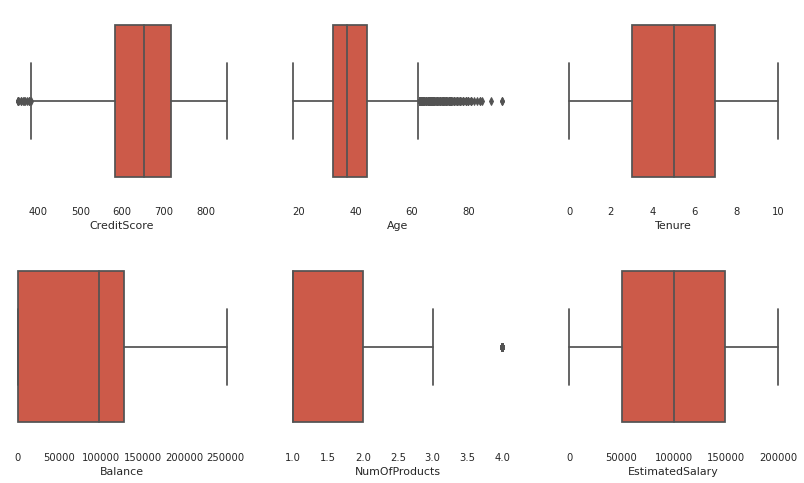

In [13]:
# boxplot var. numéricas
fig, ax = plt.subplots(2,3,figsize=(14,8))
plt.subplots_adjust(hspace=0.3)

aux=0
for i in range(2):
    for j in range(3):
        sns.boxplot(churn[numerical_var[aux]], ax=ax[i,j])
        aux+=1

#### `Exited` $\to$ var. qualitativa binária (resposta) 

- A taxa de churn da empresa é de aproximadamente 20%, se encontrando dentro do range apontado acima. Entretanto, é possível predizer o churn para realização de marketing estratégico para redução e consequente aumento do faturamento.

In [14]:
print('Taxa de churn: {}%'.format(
    round(churn[churn['Exited']==1].shape[0]/churn.shape[0]*100,2))
)

Taxa de churn: 20.37%


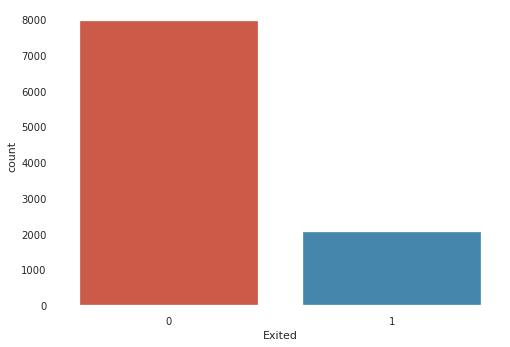

In [15]:
sns.countplot(churn['Exited']);

Nota-se que dentre as variáveis quantitativas, algumas apresentaram outliers, o que pode se tornar um problema de acordo com o algoritmo de aprendizado de máquina a ser utilizado e, sendo necessário, portanto, tratá-los.

Ademais, algumas variáveis apresentam também assimetria, sendo que, para testes estatísticos, talvez seja necessário aplica uma transformação para normalização da variável.

## Análise Bivariada

As correlações apresentadas pelo relatório acima não apresenta colinearidade entre as variáveis dependentes, tanto numéricas quanto categóricas.

As análises bivariadas a seguir buscam encontrar padrões entre as variáveis independentes e a variável dependente.

#### `Geography` $\to$ var. qualitativa nominal

- Proporção de churn geral:
    - França $\to$ 8.10%
    - Alemanha $\to$ 8.14%
    - Espanha $\to$ 4.13%


- Proporção de churn por país:
    - França $\to$ app. 16%
    - Alemanha $\to$ app. 32%
    - Espanha $\to$ app. 16%
    
Nota-se, portanto, uma proporção de churn na Alemanha é similar à da França, e o dobro da mesma quando comparado com o número de clientes do país.

In [93]:
# porcentagem de churn por país
churn.query('Exited==1').groupby(['Geography'])['Exited'].value_counts()/churn.shape[0]*100

Geography  Exited
France     1         8.10
Germany    1         8.14
Spain      1         4.13
Name: Exited, dtype: float64

In [98]:
# porcentagem de churn considerando número de clientes por país
for country in ['France','Germany','Spain']:
    print('{}: {}%'.format(country,
        round(churn.query('Geography=="%s" and Exited==1'%country).shape[0]/\
          churn.query('Geography=="%s"'%country).shape[0]*100,2))
    )

France: 16.15%
Germany: 32.44%
Spain: 16.67%


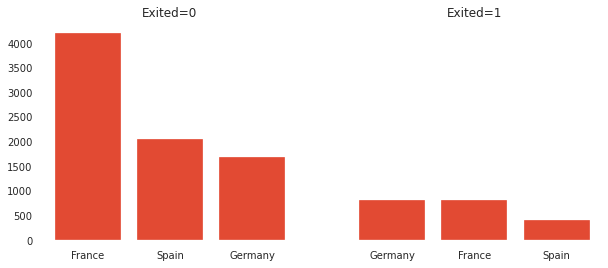

In [17]:
# barplot
fig, ax = plt.subplots(1,2,figsize=(10,4), sharey=True)
ax[0].bar(churn.query('Exited==0')['Geography'].value_counts().index,
        churn.query('Exited==0')['Geography'].value_counts().values)
ax[0].set(title='Exited=0')
ax[1].bar(churn.query('Exited==1')['Geography'].value_counts().index,
        churn.query('Exited==1')['Geography'].value_counts().values)
ax[1].set(title='Exited=1');

Aplicando o teste estatístico $\chi²$ para testar a hipótese de independência entre as variáveis `Geography` e `Exited`, temos um p-value próximo a zero. Portanto, considerando as hipóteses nula $H_0$ de que as amostras são independentes, e alternativa $H_1$ de que as amostras são dependentes, a um nível de significância de 5%, temos como resultado um p-value muitó próximo a zero, o que nos leva a rejeitar $H_0$ e aceitar $H_1$, ou seja, existe associação entre as variáveis.

Visando calcular quaão forte é a associação, a estatística V de Cramérs corrigida [[2]](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V), [[3]](http://www.mat.ufrgs.br/~viali/estatistica/mat2282/material/laminaspi/Mat2282_CC), [[4]](https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix) foi determinada, resultando em uma associação fraca de 0.17.

Portanto, sumarizando, temos que as variáveis são dependentes, porém a associação entre elas é fraca. Entretanto, é importante recordar que a associação não necessariamente significa uma relação de causa e efeito.

In [18]:
from scipy.stats import chi2_contingency

geo_exited = pd.crosstab(churn['Exited'], churn['Geography'])
geo_exited

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


In [249]:
chi2,p_value,_,_ = chi2_contingency(geo_exited)
chi2,p_value

(301.2553368243453, 3.830317605354266e-66)

In [20]:
def cramers_V(table, chi2):
    """Calcula a estatística V de Cramérs para quantificar associação entre variáveis
        com correção de Bergsma e Wicher"""
    n = table.sum().sum()
    phi2 = chi2/n
    r,c = table.shape
    phi2corr = max(0, (phi2 - ((c-1)*(r-1))/(n-1)))
    rcorr = r - ((r-1)**2)/(n-1)
    ccorr = c - ((c-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((rcorr-1),(ccorr-1)))

In [21]:
cramers_V(geo_exited, chi2)

0.17299857464855706

#### `Gender` $\to$ var. qualitativa binária

- Proporção de churn por gênero:
    - Female $\to$ app. 25%
    - Male $\to$ app. 16%

Porcentagem de homens é maior (54%) que de mulheres, mas a proporção de churn para os homens é menor.

In [22]:
churn.groupby(['Gender'])['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

In [157]:
# porcentagem de churn considerando gênero
for gender in ['Female','Male']:
    print('{}: {}%'.format(gender,
        round(churn.query('Gender=="%s" and Exited==1'%gender).shape[0]/\
          churn.query('Gender=="%s"'%gender).shape[0]*100,2))
    )

Female: 25.07%
Male: 16.46%


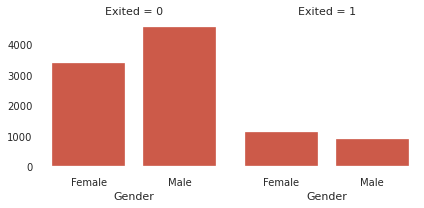

In [23]:
sns.FacetGrid(col='Exited',data=churn).map_dataframe(sns.countplot,'Gender');

Aplicando o teste estatístico $\chi²$ para testar a hipótese de independência entre as variáveis `Gender` e `Exited`, considerando um nível de significância de 5%, temos como resultado um p_value próximo a zero. Nesse caso, rejeitamos $H_0$, e aceitamos $H_1$, ou seja, as variáveis são dependentes com 95% de confiança.

Portanto, para calcular quão forte é a associação entre as variáveis, a estatística V de Crámers foi determinada, resultando em uma associação fraca de 0.106.

Sumarizando, temos uma associação entre as variáveis, entretanto, a associação é fraca.

In [24]:
gender_exited = pd.crosstab(churn['Exited'], churn['Gender'])
gender_exited

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


In [25]:
chi2,p_value,_,_ = chi2_contingency(gender_exited)
p_value

2.2482100097131755e-26

In [26]:
cramers_V(gender_exited, chi2)

0.10579681691659651

#### `HasCrCard` $\to$ var. qualitativa binária

- Proporção de churn para:
    - Não tem cartão de crédito $\to$ 21%
    - Tem cartão de crédito $\to$ 20%
    
A proporção de churn para pessoas que possuíam ou não cartão de crédito é muito próxima.

In [27]:
churn.groupby(['HasCrCard'])['Exited'].value_counts()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

In [158]:
# porcentagem de churn considerando cartão de crédito
for cc in ['0','1']:
    print('{}: {}%'.format(cc,
        round(churn.query('HasCrCard=="%s" and Exited==1'%cc).shape[0]/\
          churn.query('HasCrCard=="%s"'%cc).shape[0]*100,2))
    )

0: 20.81%
1: 20.18%


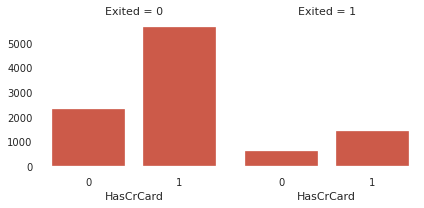

In [28]:
sns.FacetGrid(col='Exited',data=churn).map_dataframe(sns.countplot,'HasCrCard');

Aplicando o teste estatístico $\chi²$ para testar a hipótese de independência entre as variáveis `HasCrCard` e `Exited`, considerando um nível de significância de 5%, temos como resultado um p_value de 0.49. Ou seja, nesse caso, aceitamos $H_0$ i.e. as variáveis não possuem associação.

O mesmo pode ser notado através do cálculo da estatística V de Cramérs, resultando em um grau de associação nulo.

In [29]:
creditcard_exited = pd.crosstab(churn['HasCrCard'], churn['Exited'])
creditcard_exited

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [30]:
chi2,p_value,_,_ = chi2_contingency(creditcard_exited)
p_value

0.49237236141554686

In [31]:
cramers_V(creditcard_exited, chi2)

0.0

#### `IsActiveMember` $\to$ var. qualitativa binária

- Proporção de churn para:
    - Membros não ativos: 27%
    - Membros ativos: 14%
    
Nota-se que a proporção de churn entre os membros não ativos é muito superior (quase o dobro) do que dos membros ativos.

In [114]:
# contagem de valores
churn.groupby(['IsActiveMember'])['Exited'].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

In [118]:
print('Taxa de churn para clientes não ativos: {}%'.format(
round(churn.query('IsActiveMember==0 and Exited==1').shape[0]/\
      churn.query('IsActiveMember==0').shape[0]*100,2)))
print('Taxa de churn para clientes ativos: {}%'.format(
round(churn.query('IsActiveMember==1 and Exited==1').shape[0]/\
      churn.query('IsActiveMember==1').shape[0]*100,2)))

Taxa de churn para clientes não ativos: 26.85%
Taxa de churn para clientes ativos: 14.27%


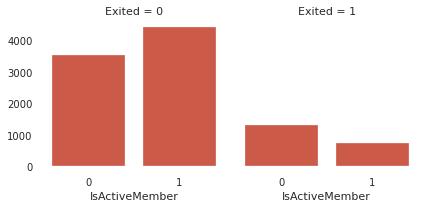

In [33]:
sns.FacetGrid(col='Exited',data=churn).map_dataframe(sns.countplot,'IsActiveMember');

Aplicando o teste estatístico $\chi²$ para testar a hipótese de independência entre as variáveis `IsActiveMember` e `Exited`, considerando um nível de significância de 5%, temos como resultado um p_value próximo a zero. Portanto, rejeitamos $H_0$ e aceitamos $H_1$ que nos diz que as variáveis são dependentes. 

Calculando a estatística V de Cramérs, temos como resultado uma associação fraca de 0.155. 

Resumindo, temos portanto uma associação entre as variáveis, porém fraca.

In [34]:
member_exited = pd.crosstab(churn['IsActiveMember'], churn['Exited'])
member_exited

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [35]:
chi2,p_value,_,_ = chi2_contingency(member_exited)
p_value

8.785858269303703e-55

In [36]:
cramers_V(member_exited, chi2)

0.15556652756866268

#### `CreditScore` $\to$ considerada var. quantitativa contínua

Através das medidas descritivas abaixo entre churn e clientes com crédito notam-se valores próximos, com distribuições semelhantes de acordo com o gráfico de distribuição de frequências.

Entretanto, nota-se valores mínimos menores para clientes com churn, e presença de outliers abaixo do mínimo (Q1-1.5*IQR), ou seja, dentre os clientes com churn, alguns possuíam crédito muito baixo.

In [37]:
churn.groupby(['Exited'])['CreditScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


In [252]:
# assimetria
print(
    churn.query('Exited==0')['CreditScore'].skew(),
    churn.query('Exited==1')['CreditScore'].skew()
)

-0.04701615897046344 -0.14107821059531359


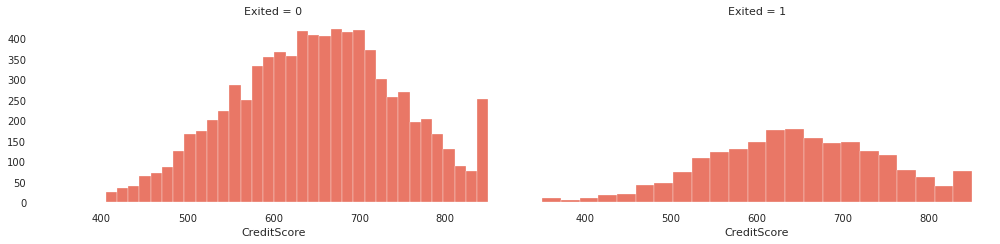

In [38]:
sns.FacetGrid(col='Exited',data=churn,
              height=3.5, aspect=2).map_dataframe(sns.histplot,'CreditScore');

Os testes abaixo foram utilizados para verificar se as distribuições diferem de uma dist. normal. O p_value resultante próximo a zero para ambos os casos nos leva a rejeitar a hipótese nula e aceitar a hipótese alternativa de que as distribuições vêm de uma dist. normal.

In [258]:
from scipy.stats import normaltest

print('Exited=0: p_value={}'.format(
    normaltest(churn.query('Exited==0')['CreditScore'])[1]))
print('Exited=1: p_value={}'.format(
    normaltest(churn.query('Exited==1')['CreditScore'])[1]))

Exited=0: p_value=1.064334140833987e-31
Exited=1: p_value=0.0005234123918279914


In [291]:
from scipy.stats import shapiro

print('Exited=0: p_value={}'.format(
    shapiro(churn.query('Exited==0')['CreditScore'])[1]))
print('Exited=1: p_value={}'.format(
    shapiro(churn.query('Exited==1')['CreditScore'])[1]))

Exited=0: p_value=1.469723138650797e-19
Exited=1: p_value=1.2323278042458696e-07


Aplicando um teste estatístico paramétrico teste-T para amostras independentes para testar a hipótese que as amostras possuem médias (valor esperado) idênticas entre as variáveis `CreditScore` e `Exited`, considerando um nível de significância de 5%, temos como resultado um p_value de 0.6%, podemos rejeitar a hipótese nula de que as amostras possuem médias idênticas.

O gráfico de pontos abaixo demonstra a diferença entre as médias. Possivelmente a presença de outliers abaixo do mínimo, como apresentado no boxplot e stripplot, fez com que a média da variável independente reduzisse para churn.

In [259]:
from scipy.stats import ttest_ind as ttest

print('p-value:',
      ttest(churn_0['CreditScore'], churn_1['CreditScore'])[1])

p-value: 0.006738213892192373


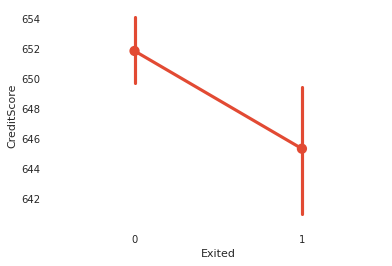

In [271]:
fig, ax=plt.subplots(figsize=(6,4))
sns.pointplot(x='Exited',y='CreditScore',data=churn,ax=ax);

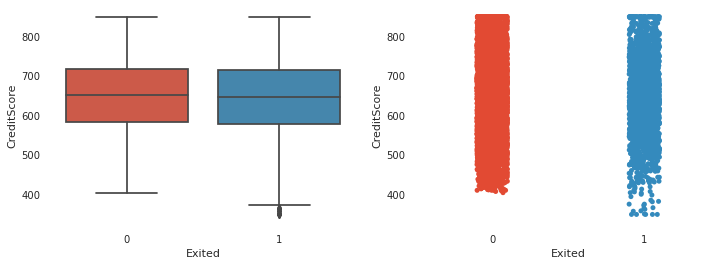

In [268]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(x='Exited', y='CreditScore', data=churn, ax=ax[0])
sns.stripplot(x='Exited', y='CreditScore', data=churn, ax=ax[1]);

Utilizando o teste de associação point biserial entre as variáveis, notamos pelo resultado uma associação negativa fraca de -0.02, ou seja, quando ocorre churn, a tendência é que o cliente tenha um crédito menor no banco.
Isso pode ser observado na redução da média no gráfico de pontos acima devido aos outliers na parte inferior apresentados anteriormente.

Nota-se, também, pelo resultado do p-value que a associação entre as variáveis, ainda que seja fraca, é estatisticamente significante, pois p-value < 5%.

In [272]:
from scipy.stats import pointbiserialr as pb

corr,p_value = pb(churn['Exited'], churn['CreditScore'])
corr,p_value

(-0.027093539754657787, 0.006738213892225283)

Aplicando o KDE, notam-se regiões nas quais a densidade de probabilidade de churn aparenta ser superior:

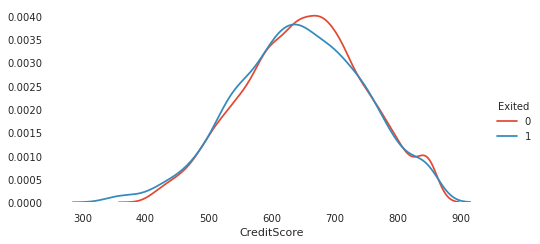

In [39]:
sns.FacetGrid(hue='Exited',data=churn,
             height=3.5, aspect=2).map_dataframe(sns.kdeplot,'CreditScore').add_legend();

A função abaixo calcula a probabilidade de uma variável através da integral aproximada da F.D.P de um determinado número de pontos [[5]](https://github.com/admond1994/calculate-probability-from-probability-density-plots/blob/master/cal_probability.ipynb).

In [40]:
from sklearn.neighbors import KernelDensity

def calculate_probability(df, col, eval_points, start_value, end_value):
    """Calcula a probabilidade do campo através a integral aproximada da 
    função de densidade de probabilidade"""
    
    # reshape df
    df = np.array(df['%s'%col]).reshape(-1,1)
    
    # do kde
    kde_df = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(df)

    # number of eval points
    N = eval_points
    step = (end_value - start_value)/(N-1)
    
    x = np.linspace(start_value, end_value, N)[:, np.newaxis]
    
    # get samples
    kde_vals = np.exp(kde_df.score_samples(x))
    
    # integrate (app.) PDF
    probability = np.sum(kde_vals * step)
    
    return probability.round(4)

Cria dfs para churn=0 & churn=1:

In [41]:
# cria dois df para a variável resposta
churn_0 = churn[churn['Exited']==0]
churn_1 = churn[churn['Exited']==1]

Explorar a variável `CreditScore` a cada 100 unidades, nota-se que existem três regiões nas quais a densidade de probabilidade é superior para churn, todas com valores abaixo de Q3, porém nenhuma região com diferença significativa:

In [42]:
# valores mínimo e máximo da variável
churn['CreditScore'].min(), churn['CreditScore'].max()

(350, 850)

In [43]:
print('[350-450]: Churn=0:',
    calculate_probability(churn_0, 'CreditScore', 500, 350, 450),
      'Churn=1:',
    calculate_probability(churn_1, 'CreditScore', 500, 350, 450)
)
print('[450-550]: Curn=0:',
    calculate_probability(churn_0, 'CreditScore', 500, 450, 550),
      'Churn=1:',
    calculate_probability(churn_1, 'CreditScore', 500, 450, 550)
)
print('[550-650]: Churn=0:',
    calculate_probability(churn_0, 'CreditScore', 500, 550, 650),
      'Churn=1:',
    calculate_probability(churn_1, 'CreditScore', 500, 550, 650)
)
print('[650-750]: Churn=0:',
    calculate_probability(churn_0, 'CreditScore', 500, 650, 750),
      'Churn=1:',
    calculate_probability(churn_1, 'CreditScore', 500, 650, 750)
)
print('[750-850]: Churn=0:',
    calculate_probability(churn_0, 'CreditScore', 500, 750, 850),
      'Churn=1:',
    calculate_probability(churn_1, 'CreditScore', 500, 750, 850)
)

[350-450]: Churn=0: 0.0159 Churn=1: 0.0289
[450-550]: Curn=0: 0.1404 Churn=1: 0.1493
[550-650]: Churn=0: 0.3303 Churn=1: 0.3389
[650-750]: Churn=0: 0.3527 Churn=1: 0.3281
[750-850]: Churn=0: 0.1526 Churn=1: 0.1472


#### `Age` $\to$ considerada var. quantitativa contínua

Através das estatísticas descritivas abaixo, nota-se que as diversas medidas resumo (média, mediana, quartis) da idade é maior para clientes com churn, a qual pode ser claramente vista no gráfico de pontos que representa a média de idade para clientes com churn e sem churn (inferenciado pelo test-T abaixo).

Ademais, a distribuição de frequências da idade de clientes sem churn possui uma maior assimetria à direita, enquanto a distribuição da idade por clientes que saíram é razoavelmente simétrica.

In [48]:
churn.groupby(['Exited'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


In [262]:
# assimetria several para churn=0
print(
    churn_0['Age'].skew(),
    churn_1['Age'].skew()
)

1.3776989459755633 0.07797762023540633


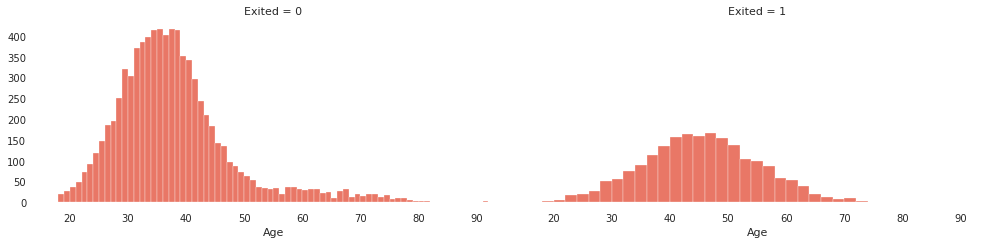

In [49]:
sns.FacetGrid(col='Exited',data=churn,
              height=3.5, aspect=2).map_dataframe(sns.histplot,'Age');

Aplicando um teste estatístico não-paramétrico U de Mann-Whitney para testa a hipótese de amostras independentes para igualdade de medianas entre as variáveis `Age` e `Exited`, ou seja, se uma população tende a ter valores mais que a outra [[5]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html), [[6]](http://www.inf.ufsc.br/~vera.carmo/Testes_de_Hipoteses/Testes_nao_parametricos_Mann-Whitney.pdf), [[7]](http://www.portalaction.com.br/tecnicas-nao-parametricas/teste-de-wilcoxon-mann-whitney-amostras-independentes), temos como resultado p-value $\approx$ 0. Considerando um nível de significância de 5%, podemos rejeitar a hipótese nula do teste de que as medianas são iguais, aceitando portanto a hipótese alternativa de que as amostras possuem medianas diferentes. 

Isso pode ser notado visualmente pelo gráfico de pontos abaixo, demonstrando uma mediana inferior para churn. Nota-se, também, a presença de outliers para ambos os casos, mas muito superior para `Exited`=0, como visto no boxplot e stripplot, fatores que causaram a assimetria (longa calda) à direita, como visto nos gráficos de dist. de frequências acima.

PS: o teste não-paramétrico foi utilizado pois as distribuições não são normais, uma das premissas de um teste paramétrico como o teste-T.

In [265]:
from scipy.stats import mannwhitneyu as utest

print('p-value:',
      utest(churn_0['Age'], churn_1['Age'])[1])

p-value: 1.6052007159685838e-230


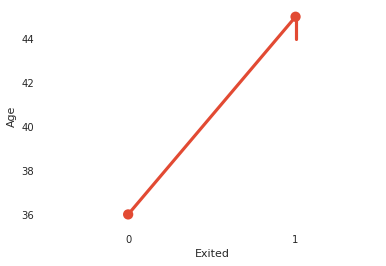

In [276]:
fig, ax=plt.subplots(figsize=(6,4))
sns.pointplot(x='Exited',y='Age',data=churn,estimator=np.median,ax=ax);

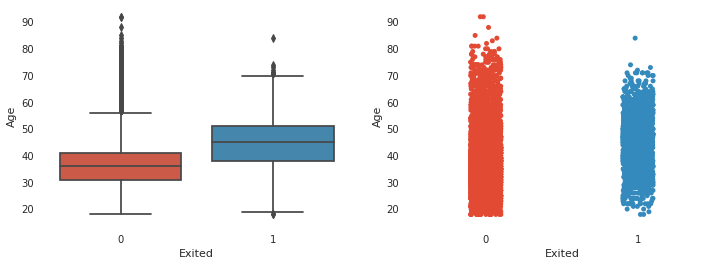

In [274]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(x='Exited', y='Age', data=churn, ax=ax[0])
sns.stripplot(x='Exited', y='Age', data=churn, ax=ax[1]);

Aplicando um teste de associação point biserial entre as variáveis `Exited` e `Age`, nota-se que existe uma correção positiva moderada de app. 30%, ou seja, quando um cliente sai do banco, a tendência é que ele seja mais velho.

O mesmo pode ser visto pelo p-value, com valor muito póximo de zero, o que nos diz que a associação entre as variáveis é estatisticamente significante.

In [275]:
corr,p_value = pb(churn['Exited'], churn['Age'])
corr,p_value

(0.28532303783506824, 1.2399313093495365e-186)

Ao aplicar o KDE na variável, segmentando por churn, a densidade de probabilidade de churn aparenta ser maior acima dos 40 anos:

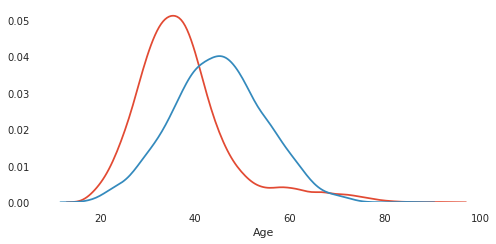

In [50]:
sns.FacetGrid(hue='Exited',data=churn,
              height=3.5, aspect=2).map_dataframe(sns.kdeplot,'Age');

Aplicando a função para integral da f.d.p. em regiões criada acima, é possível notar que de fato a região onde `Age` $\ge$45 e $\le$65 o churn possui maior densidade de probabilidade:

In [51]:
# valores mínimo e máximo da variável
churn['Age'].min(), churn['Age'].max()

(18, 92)

In [52]:
print('[18-30]: Churn=0:',
      calculate_probability(churn_0, 'Age', 300, 18, 30),
      'Churn=1:',
      calculate_probability(churn_1, 'Age', 300, 18, 30)
)
print('[30-45]: Churn=0:',
      calculate_probability(churn_0, 'Age', 300, 30, 45),
      'Churn=1:',
      calculate_probability(churn_1, 'Age', 300, 30, 45)
)
print('[45-60]: Churn=0:',
      calculate_probability(churn_0, 'Age', 300, 45, 60),
      'Churn=1:',
      calculate_probability(churn_1, 'Age', 300, 45, 60)
)
print('[60-70]: Churn=0:',
      calculate_probability(churn_0, 'Age', 300, 60, 75),
      'Churn=1:',
      calculate_probability(churn_1, 'Age', 300, 60, 75)
)
print('[75-95]: Churn=0:',
      calculate_probability(churn_0, 'Age', 300, 75, 95),
      'Churn=1:',
      calculate_probability(churn_1, 'Age', 300, 75, 95)
)

[18-30]: Churn=0: 0.2092 Churn=1: 0.0666
[30-45]: Churn=0: 0.6378 Churn=1: 0.4436
[45-60]: Churn=0: 0.1088 Churn=1: 0.428
[60-70]: Churn=0: 0.0397 Churn=1: 0.0643
[75-95]: Churn=0: 0.0062 Churn=1: 0.0005


#### `Tenure` $\to$ considerada var. quantitativa contínua

Através das figuras de contagem abaixo, nota-se que a tendência é similar, com contagem inferior para os anos 0 e 10. No caso de churn, a taxa nestes anos é de aproximadamente 5%, metade dos demais anos.

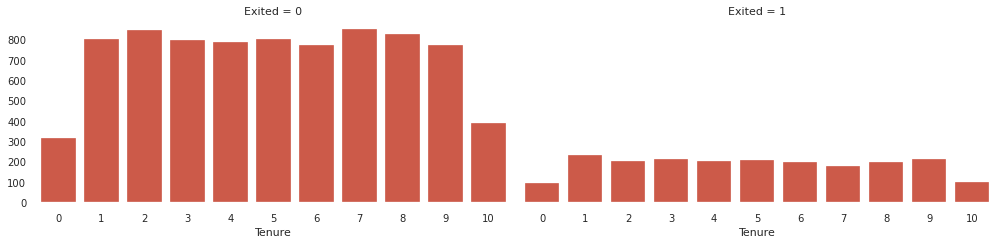

In [58]:
sns.FacetGrid(col='Exited',data=churn,height=3.5,aspect=2).map_dataframe(sns.countplot,'Tenure');

In [188]:
# porcentagem de churn por ano
print(
round(churn.query('Exited==1').groupby('Tenure')['Exited'].value_counts()/\
      churn.query('Exited==1').shape[0]*100,2)
)

Tenure  Exited
0       1          4.66
1       1         11.39
2       1          9.87
3       1         10.46
4       1          9.97
5       1         10.26
6       1          9.62
7       1          8.69
8       1          9.67
9       1         10.46
10      1          4.96
Name: Exited, dtype: float64


Aplicando um teste de associação point biserial entre as variáveis `Exited` e `Tenure`, nota-se que existe uma correção negativa fraca de -0.01, ou seja, quando um cliente sai do banco, a tendência é que ele seja cliente do banco a menos tempo.

Entretanto, considerando um nível de significância de 5%, nota-se pelo p-value de 16% que a associação entre as variáveis não é estatisticamente significante.

In [59]:
corr,p_value = pb(churn['Exited'], churn['Tenure'])
corr,p_value

(-0.014000612253444605, 0.16152684949563412)

#### `Balance` $\to$ var. quantitativa contínua

Através das estatísticas descritivas abaixo, nota-se que a distribuição de clientes que não saíram do banco se encontra mais deslocada para a esquerda (diferença entre as médias como apresentado no teste t abaixo), sendo que ainda em Q1 o valor da variável ainda é zero.

In [60]:
churn.groupby(['Exited'])['Balance'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


In [277]:
# assimetria several para churn=0
print(
    churn_0['Balance'].skew(),
    churn_1['Balance'].skew()
)

-0.04688735375712353 -0.5127317438747061


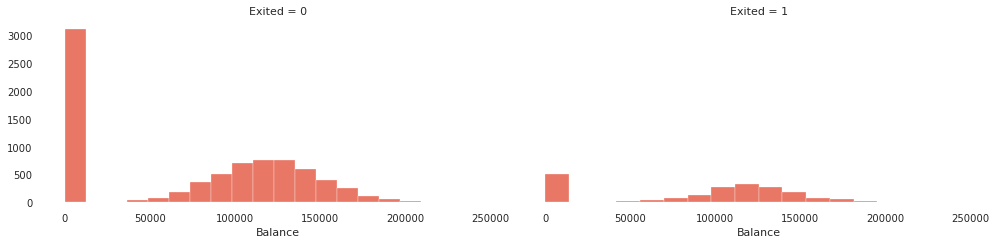

In [61]:
sns.FacetGrid(col='Exited',data=churn,
              height=3.5, aspect=2).map_dataframe(sns.histplot,'Balance');

Aplicando o teste de normalidade, temos como resultado p_value resultante próximo a zero para ambos os casos, o que nos leva a rejeitar a hipótese nula e aceitar a hipótese alternativa de que as distribuições vêm de uma dist. normal.

In [278]:
print('Exited=0: p_value={}'.format(
    normaltest(churn_0['Balance'])[1]))
print('Exited=1: p_value={}'.format(
    normaltest(churn_1['Balance'])[1]))

Exited=0: p_value=0.0
Exited=1: p_value=3.655495885721507e-86


Aplicando um teste estatístico paramétrico teste-T para amostras independentes para testar a hipótese que as amostras possuem médias (valor esperado) idênticas entre as variáveis `Balance` e `Exited`, considerando um nível de significância de 5%, temos como resultado um p_value $\approx$ 0, podemos rejeitar a hipótese nula de que as amostras possuem médias idênticas.

O gráfico de pontos abaixo demonstra a diferença entre as médias. Possivelmente a presença de outliers abaixo do mínimo, como apresentado no boxplot e stripplot, fez com que a média da variável independente reduzisse para churn.

In [279]:
print('p-value:',
    ttest(churn_0['Balance'], churn_1['Balance'])[1])

p-value: 1.2755633191525477e-32


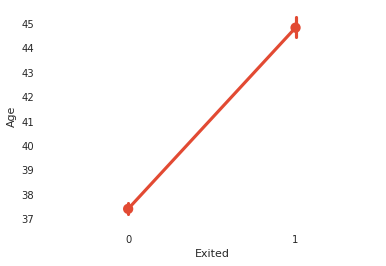

In [280]:
fig, ax=plt.subplots(figsize=(6,4))
sns.pointplot(x='Exited',y='Age',data=churn,ax=ax);

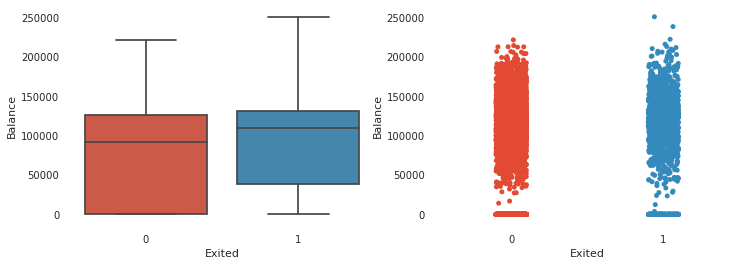

In [281]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(x='Exited', y='Balance', data=churn, ax=ax[0])
sns.stripplot(x='Exited', y='Balance', data=churn, ax=ax[1]);

Entretanto, aplicando o teste-T para `Balance`$\ge$0.005, nota-se que o p-value=0.169, superior a 5%, ou seja, nesse caso aceitamos a hipótese nula de que as médias (valor esperado) são iguais, como pode ser visto na visualização abaixo, onde a variação entre as médias nesse caso é muito menor, como pode ser visto principalmente no boxplot a seguir, ainda que com outliers (que possivelmente aparecem devido à grande redução de pontos inferiore i.e. 0). 

Ou seja, nesse caso, a grande presença de valores zero para `Exited`=0 puxa a média da variável para baixo.

In [ ]:
print('p-value:',
    ttest(churn_0.query('Balance>0.005')['Balance'], churn_1.query('Balance>0.005')['Balance'])[1])

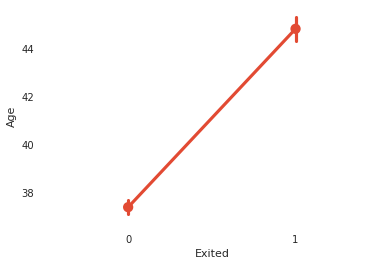

In [282]:
fig, ax=plt.subplots(figsize=(6,4))
sns.pointplot(x='Exited',y='Age',data=churn.query('Balance >=0.005'),ax=ax);

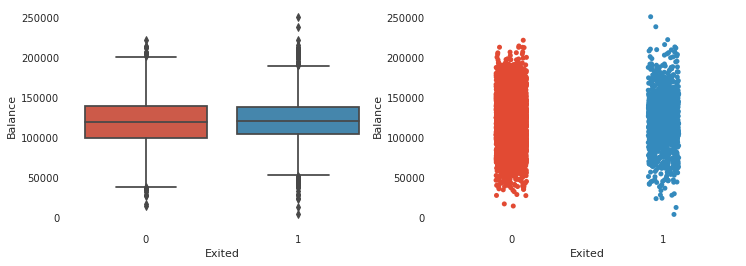

In [283]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(x='Exited', y='Balance', data=churn.query('Balance >=0.005'), ax=ax[0])
sns.stripplot(x='Exited', y='Balance', data=churn.query('Balance >=0.005'), ax=ax[1]);

Aplicando um teste de associação point biserial entre as variáveis `Exited` e `Balance`, nota-se que existe uma associação positiva fraca de 0.118, ou seja, quando um cliente sai do banco, a tendência é que ele tenha mais dinheiro em conta.

Ademais, considerando um nível de significância de 5%, nota-se pelo p-value de próximo a zero que a associação entre as variáveis é estatisticamente significante.

In [284]:
corr,p_value = pb(churn['Exited'], churn['Balance'])
corr,p_value

(0.11853276877163402, 1.275563319158762e-32)

Entretanto, excluindo-se os valores zero, a associação é próxima a zero, não sendo estatisticamente significante. Portanto, é possível que os valores zero da variável seja um fator de influência na associação.

In [285]:
corr,p_value = pb(churn.query('Balance >=0.005')['Exited'], churn.query('Balance >=0.005')['Balance'])
corr,p_value

(0.01720779085918183, 0.16924734893412585)

Aplicando o KDE nota-se visivelmente que a variável `Balance` possui característica bimodal, onde a probabilidade de um cliente não ter saído quando seu balanço é zero aparenta ser muito maior que a probabilidade de churn quando o balanço é positivo.

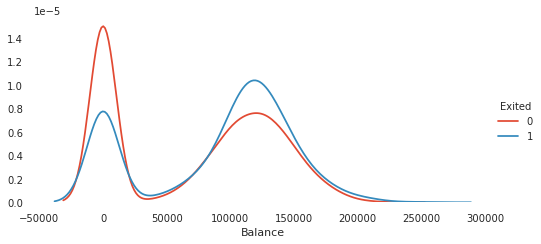

In [62]:
sns.FacetGrid(hue='Exited',data=churn,
              height=3.5, aspect=2).map_dataframe(sns.kdeplot,'Balance').add_legend();

A proporção de clientes não que saíram e não possuem dinheiro em conta é 39%, em contraste com 24% dos clientes que saíram e não tinham dinheiro em conta.

In [63]:
print(churn.query('Exited==0 and Balance==0').shape[0],
    churn.query('Exited==0 and Balance>0').shape[0])
print(churn.query('Exited==1 and Balance==0').shape[0],
    churn.query('Exited==1 and Balance>0').shape[0])

3117 4846
500 1537


Aplicando a função de integração criada anteriormente para valores muito próximos a zero (apenas clientes sem dinheiro em conta), nota-se que de fato a densidade de probabilidade é maior para clientes sem saldo:

In [64]:
# calcular o shape para clientes com Balnace<0.005 -> igual a Balance==0
print(
    churn.query('Exited==0 and Balance<0.005').shape[0],
    churn.query('Exited==1 and Balance<0.005').shape[0]
)

3117 500


In [65]:
print('[0-0.005]: Churn=0',
     calculate_probability(churn_0, 'Balance', 200, 0, 0.005),
    'Churn=1:',
      calculate_probability(churn_1, 'Balance', 200, 0, 0.005)
)

[0-0.005]: Churn=0 0.0016 Churn=1: 0.001


Aplicando agora a função para segmentação de `Balance` a cada 50k, nota-se que a densidade de probabilidade de churn é superior para maiores valores da variável i.e. acima de 100k:

In [66]:
# valor máximo da variável
churn['Balance'].max()

250898.09

In [67]:
print('[0.005-50k]: Churn=0',
     calculate_probability(churn_0, 'Balance', 100000, 0.005, 50000),
    'Churn=1:',
      calculate_probability(churn_1, 'Balance', 100000, 0.005, 50000)
)
print('[50k-100k]: Churn=0',
     calculate_probability(churn_0, 'Balance', 100000, 50000, 100000),
    'Churn=1:',
      calculate_probability(churn_1, 'Balance', 100000, 50000, 100000)
)
print('[100k-150k]: Churn=0',
     calculate_probability(churn_0, 'Balance', 100000, 100000, 150000),
    'Churn=1:',
      calculate_probability(churn_1, 'Balance', 100000, 100000, 150000)
)
print('[150k-200k]: Churn=0',
     calculate_probability(churn_0, 'Balance', 100000, 150000, 200000),
    'Churn=1:',
      calculate_probability(churn_1, 'Balance', 100000, 150000, 200000)
)
print('[200k-250k]: Churn=0',
     calculate_probability(churn_0, 'Balance', 100000, 200000, 250900),
    'Churn=1:',
      calculate_probability(churn_1, 'Balance', 100000, 200000, 250900)
)

[0.005-50k]: Churn=0 0.2785 Churn=1: 0.1836
[50k-100k]: Churn=0 0.1518 Churn=1: 0.1473
[100k-150k]: Churn=0 0.357 Churn=1: 0.4845
[150k-200k]: Churn=0 0.0917 Churn=1: 0.1006
[200k-250k]: Churn=0 0.0019 Churn=1: 0.0093


#### ` NumOfProducts` $\to$ var. quantitativa discreta

Nota-se que o número de produtos comprados pelos clientes com churn tendem a ser maiores, como pode ser visto pelo valor máximo de produtos entre clientes com e sem churn, ou seja, nenhum cliente que permaneceu no banco comprou 4 produtos.

Pelo gráfico de contagem a seguir, nota-se que a contagem de churn para clientes que compraram 3 ou 4 produtos é muito superior:

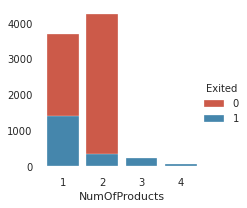

In [77]:
sns.FacetGrid(hue='Exited',data=churn).map_dataframe(sns.countplot,'NumOfProducts').add_legend();

In [147]:
print('Taxa de churn para clientes que compraram 1 produto: {}%'.format(
    round(churn.query('NumOfProducts==1 and Exited==1').shape[0]/\
          churn.query('NumOfProducts==1').shape[0]*100,2))
)

print('Taxa de churn para clientes que compraram 2 produtos: {}%'.format(
    round(churn.query('NumOfProducts==2 and Exited==1').shape[0]/\
          churn.query('NumOfProducts==2').shape[0]*100,2))
)

print('Taxa de churn para clientes que compraram 3 produtos: {}%'.format(
    round(churn.query('NumOfProducts==3 and Exited==1').shape[0]/\
          churn.query('NumOfProducts==3').shape[0]*100,2))
)

print('Taxa de churn para clientes que compraram 4 produtos: {}%'.format(
    round(churn.query('NumOfProducts==4 and Exited==1').shape[0]/\
          churn.query('NumOfProducts==4').shape[0]*100,2))
)

Taxa de churn para clientes que compraram 1 produto: 27.71%
Taxa de churn para clientes que compraram 2 produtos: 7.58%
Taxa de churn para clientes que compraram 3 produtos: 82.71%
Taxa de churn para clientes que compraram 4 produtos: 100.0%


Aplicando um teste de associação point biserial entre as variáveis `Exited` e `NumOfProducts`, nota-se que existe uma correção negativa fraca de 0.05, ou seja, quando um cliente sai do banco, a tendência é que ele tenha mais dinheiro em conta.

Ademais, considerando um nível de significância de 5%, nota-se pelo p-value de próximo a zero que a associação entre as variáveis é estatisticamente significante.

In [80]:
corr,p_value = pb(churn['Exited'], churn['NumOfProducts'])
corr,p_value

(-0.047819864949440835, 1.717333004813084e-06)

#### `EstimatedSalary`$\to$ var. quantitativa contínua

Através das estatísticas descritivas abaixo, nota-se que as distribuições devem ser muito próximas devido à proximidade das medidas estatísticas descritivas e.g. média, o que pode ser visto pelo gráfico de distribuição de frequências abaixo.

In [81]:
churn.groupby(['Exited'])['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
1,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10


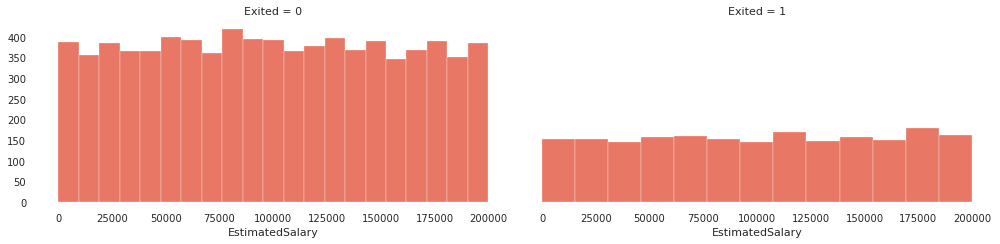

In [82]:
sns.FacetGrid(col='Exited',data=churn,
              height=3.5, aspect=2).map_dataframe(sns.histplot,'EstimatedSalary');

Aplicando um teste de Mann-Whitney para amostras independentes, nota-se um p-value de 22%, superior ao nível de significância de 5% considerado para todos os casos e, portanto, aceitamos a hipótese nula de que as amostras possuem distribuições iguais.

Nota-se que as medianas, pelo gráfico de pontos, são muito próximas, considerando o range de valores da variável (11 - 200k).

In [290]:
print('p-value:',
    utest(churn_0['EstimatedSalary'], churn_1['EstimatedSalary'])[1])

p-value: 0.11352575465076892


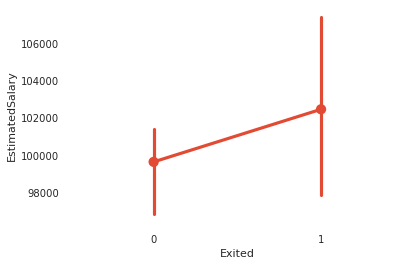

In [287]:
fig, ax=plt.subplots(figsize=(6,4))
sns.pointplot(x='Exited',y='EstimatedSalary',data=churn,estimator=np.median,ax=ax);

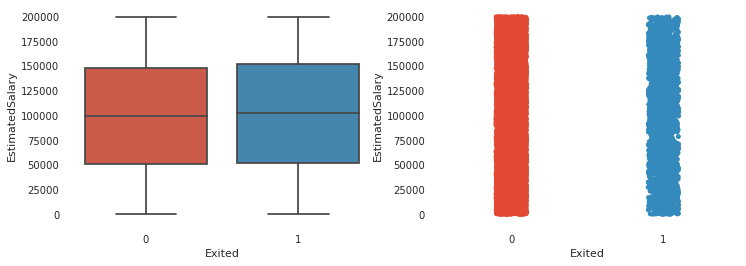

In [288]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(x='Exited', y='EstimatedSalary', data=churn, ax=ax[0])
sns.stripplot(x='Exited', y='EstimatedSalary', data=churn, ax=ax[1]);

Aplicando um teste de associação point biserial entre as variáveis `Exited` e `EstimatedSalary`, nota-se que existe uma correção positiva fraca de 0.01, ou seja, quando um cliente sai do banco, a tendência é que ele tenha um salário menor.

Porém, considerando um nível de significância de 5%, nota-se pelo p-value cima de 5% que a associação entre as variáveis não estatisticamente significante.

In [289]:
corr,p_value = pb(churn['Exited'], churn['EstimatedSalary'])
corr,p_value

(0.01209686102684466, 0.22644042802341122)

Aplicando o KDE para a variável, visualmente algumas regiões aparentam possuir maior densidade de probabilidade para churn:

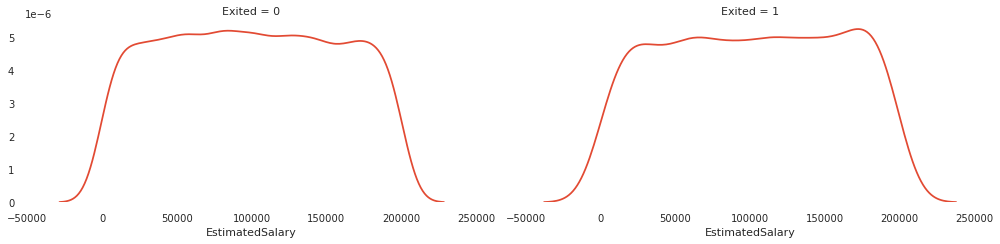

In [83]:
sns.FacetGrid(col='Exited',data=churn,
              height=3.5, aspect=2).map_dataframe(sns.kdeplot,'EstimatedSalary');

Aplicando a função de integração da FDP, nota-se que para uma segmentação de 50k, `EstimatedSalary`$\ge$150k e $\le$200k apresenta uma maior densidade de probabilidade para churn, as a diferença não é significativa.

In [84]:
# valores máximo e mínimo da variável
churn['EstimatedSalary'].min(), churn['EstimatedSalary'].max()

(11.58, 199992.48)

In [85]:
print('[0-50k]: Churn=0',
     calculate_probability(churn_0, 'EstimatedSalary', 100000, 0, 50000),
    'Churn=1:',
      calculate_probability(churn_1, 'EstimatedSalary', 100000, 0, 50000)
)
print('[50k-100k]: Churn=0',
     calculate_probability(churn_0, 'EstimatedSalary', 100000, 50000, 100000),
    'Churn=1:',
      calculate_probability(churn_1, 'EstimatedSalary', 100000, 50000, 100000)
)
print('[100k-150k]: Churn=0',
     calculate_probability(churn_0, 'EstimatedSalary', 100000, 100000, 150000),
    'Churn=1:',
      calculate_probability(churn_1, 'EstimatedSalary', 100000, 100000, 150000)
)
print('[150k-200k]: Churn=0',
     calculate_probability(churn_0, 'EstimatedSalary', 100000, 150000, 200000),
    'Churn=1:',
      calculate_probability(churn_1, 'EstimatedSalary', 100000, 150000, 200000)
)

[0-50k]: Churn=0 0.2466 Churn=1: 0.2401
[50k-100k]: Churn=0 0.2553 Churn=1: 0.2474
[100k-150k]: Churn=0 0.2559 Churn=1: 0.2538
[150k-200k]: Churn=0 0.2421 Churn=1: 0.2587


### Sumarização

- A única variável que apresentou uma associação aproximadamente moderada com a var. resposta `Exited` foi a var. `Idade`
- As variáveis que não apresentaram nenhuma associação com a var. resposta `Exited` ou associação fraca e não significativa estatisticamente foram `HasCrCard`, `Tenure` e `EstimatedSalary`
- As demais variáveis apresentaram associação fraca i.e. valor entre 0 e 0.3 (valor absoluto)

# Análises

Após as análises bivariadas entre as var. independentes e a dependente, análises multivariadas serão aplicadas visando gerar alguns insights:

#### - Sumarização:

- `Geography` $\to$ Taxa de churn para França: 8.1%, Alemanha: 8.14% e Espanha: 4.13%
- `Gender` $\to$ Taxa de churn para mulheres: 25% e para homens: 16%
- `HasCrCard` $\to$ Taxa de churn para clientes sem cartão de crédito: 20.8% e com cartão de crédito: 20.2%
- `IsActiveMember` $\to$ Taxa de churn para membros não ativos: 27% e membros ativos: 14%
- `CreditScore` $\to$ 
- `Age` $\to$ 
- `Tenure` $\to$
- `Balance` $\to$ Alemanha não possui clientes sem saldo
- `NumOfProducts` $\to$ Taxa de churn para: 1 produto: 27%, 2 produtos: 7%, 3 produtos: 82%, 4 produtos: 100%
- `EstimatedSalary` $\to$

In [90]:
categorical_var

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [91]:
numerical_var

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

#### 1) Explicar a taxa de churn da Alemanha, tão próxima à da França (país com aproximadamente dobro de clientes)?

Nota-se pelas figuras abaixo que a Alemanha, ainda que possua um menor número de clientes, possui uma contagem de churn relativamente alta (semelhante à da França, a qual possui o mais número de clientes) para todas as variáveis categóricas, como também para número de produtos e tenure, com porcentagem relativa de churn sempre próxima de 40%, que é de fato a frequência de churn relativa do país. Ou seja, nenhuma das variáveis comentadas apresenta uma grande variação na frequência de churn.

Tratando das variáveis contínuas, `Age` apresenta uma densidade de probabilidade de churn entre 45 e 60 anos de aproximadamente 40%. Entretanto, o grande diferencial á para a variável `Balance`, a qual apresenta uma densidade de probabilidade entre 100k e 150k de 79% quando o país é Alemanha, significativamente superior aos demais.

In [153]:
# número de clientes por país
churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [160]:
# contagem de churn por país
churn.query('Exited==1')['Geography'].value_counts()

Germany    814
France     810
Spain      413
Name: Geography, dtype: int64

Taxa de churn (%) por gênero para Alemanha:
 Gender  Exited
Female  1         21.99
Male    1         17.97
Name: Exited, dtype: float64


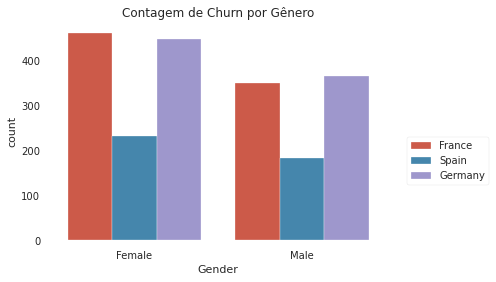

In [213]:
# gênero
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot('Gender',hue='Geography',data=churn.query('Exited==1'),ax=ax)
plt.title('Contagem de Churn por Gênero')
plt.legend(bbox_to_anchor=(1.05,0.5))

# porcentagem
print('Taxa de churn (%) por gênero para Alemanha:\n',
round(churn.query('Exited==1 and Geography=="Germany"').groupby(['Gender'])['Exited'].value_counts()/\
        churn.query('Exited==1').shape[0]*100,2)
)

Taxa de churn (%) para cartão de crédito para Alemanha:
 HasCrCard  Exited
0          1         11.63
1          1         28.33
Name: Exited, dtype: float64


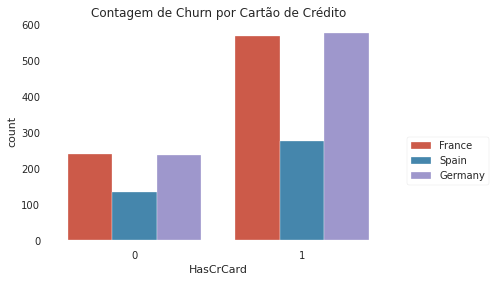

In [215]:
# membro ativo
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot('HasCrCard',hue='Geography',data=churn.query('Exited==1'),ax=ax)
plt.title('Contagem de Churn por Cartão de Crédito')
plt.legend(bbox_to_anchor=(1.05,0.5))

# porcentagem
print('Taxa de churn (%) para cartão de crédito para Alemanha:\n',
round(churn.query('Exited==1 and Geography=="Germany"').groupby(['HasCrCard'])['Exited'].value_counts()/\
        churn.query('Exited==1').shape[0]*100,2)
)

Taxa de churn (%) para membro ativo para Alemanha:
 IsActiveMember  Exited
0               1         25.43
1               1         14.53
Name: Exited, dtype: float64


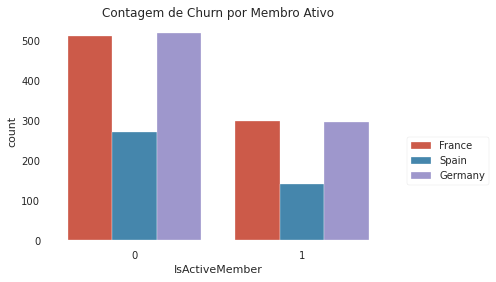

In [216]:
# membro ativo
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot('IsActiveMember',hue='Geography',data=churn.query('Exited==1'),ax=ax)
plt.title('Contagem de Churn por Membro Ativo')
plt.legend(bbox_to_anchor=(1.05,0.5))

# porcentagem
print('Taxa de churn (%) para membro ativo para Alemanha:\n',
round(churn.query('Exited==1 and Geography=="Germany"').groupby(['IsActiveMember'])['Exited'].value_counts()/\
        churn.query('Exited==1').shape[0]*100,2)
)

Taxa de churn (%) por número de produtos para Alemanha:
 NumOfProducts  Exited
1              1         28.38
2              1          6.19
3              1          4.22
4              1          1.18
Name: Exited, dtype: float64


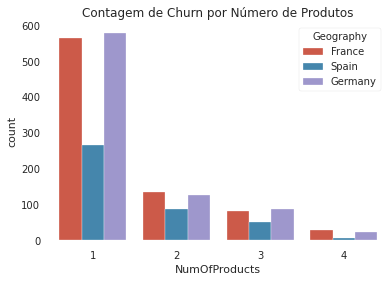

In [218]:
# número de produtos
fig, ax=plt.subplots(figsize=(6,4))
sns.countplot('NumOfProducts',hue='Geography',data=churn.query('Exited==1'),ax=ax)
plt.title('Contagem de Churn por Número de Produtos')

# porcentagem
print('Taxa de churn (%) por número de produtos para Alemanha:\n',
round(churn.query('Exited==1 and Geography=="Germany"').groupby(['NumOfProducts'])['Exited'].value_counts()/\
        churn.query('Exited==1').shape[0]*100,2)
)

Variação da taxa de churn (%) por ano:
 Tenure  Exited
0       1         1.77
1       1         5.15
2       1         3.14
3       1         4.12
4       1         3.73
5       1         4.42
6       1         3.73
7       1         2.99
8       1         4.27
9       1         4.57
10      1         2.06
Name: Exited, dtype: float64


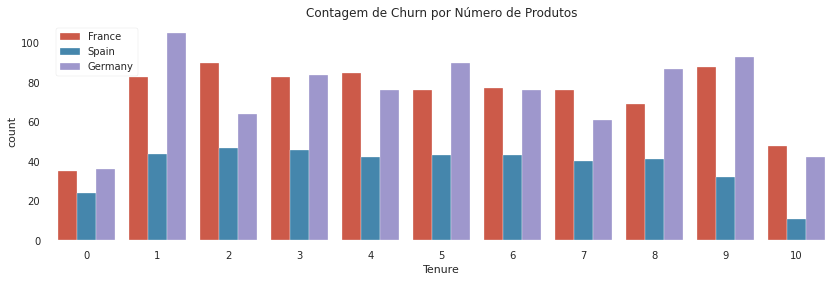

In [190]:
# tenure
fig, ax=plt.subplots(figsize=(14,4))
sns.countplot('Tenure',hue='Geography',data=churn.query('Exited==1'),ax=ax)
plt.title('Contagem de Churn por Número de Produtos')
plt.legend(loc=2)

print('Variação da taxa de churn (%) por ano:\n',
round(churn.query('Exited==1 and Geography=="Germany"').groupby(['Tenure'])['Exited'].value_counts()/\
        churn.query('Exited==1').shape[0]*100,2)
)

Analisando o KDE plot de churn por países abaixo, nota-se que a densidade de probabilidade para Alemanha é superior entre 45 e 60 anos, como demonstrado abaixo com o integração da densidade de probabilidade para o intervalo mencionado.

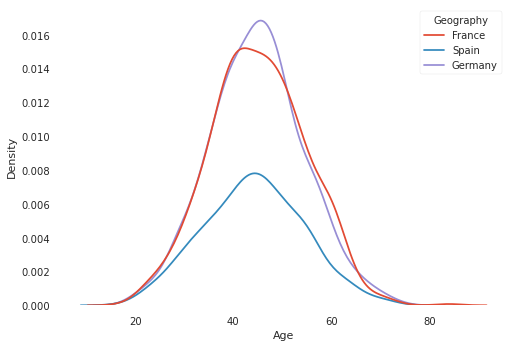

In [229]:
sns.kdeplot('Age',hue='Geography',data=churn.query('Exited==1'));

In [239]:
# densidade de probabilidade para churn=1
print('Densidade de probabilidade por intervalo:')
print('[45-60]: Alemanha:',
      calculate_probability(churn_1.query('Geography=="Germany"'), 'Age', 300, 45, 60),
      'Demais países:',
      calculate_probability(churn_1.query('Geography!="Germany"'), 'Age', 300, 45, 60)
)

Densidade de probabilidade por intervalo:
[45-60]: Alemanha: 0.4378 Demais países: 0.4215


In [238]:
# Taxa de churn para o range de idade com maior probabilidade
print('De um total de {} clientes no range, {} clientes tiveram evasão, onde {} ({}%) são da Alemanha.'.format(
    churn.query('45<=Age<=60').shape[0],
    churn.query('45<=Age<=60 and Exited==1').shape[0],
    churn.query('Geography=="Germany" and 45<=Age<=60 and Exited==1').shape[0],
round(churn.query('Geography=="Germany" and 45<=Age<=60 and Exited==1').shape[0]/\
    churn.query('45<=Age<=60 and Exited==1').shape[0]*100,2))
     )

De um total de 1876 clientes no range, 929 clientes tiveram evasão, onde 380 (40.9%) são da Alemanha.


Analisando a relação entre as variáveis `Geography` e `Balance`, nota-se que não existem clientes sem saldo na Alemanha, enquanto o comportamento bimodal segue nos demais países. Ademais, nota-se que a densidade de probabilidade de churn aparenta ser maior para clientes da Alemanha entre 100k e 150k:

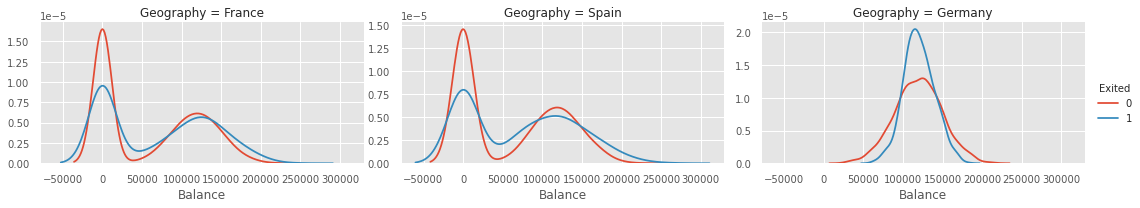

In [275]:
sns.FacetGrid(col='Geography',hue='Exited',height=3,aspect=1.7,
               data=churn,sharey=False).map_dataframe(sns.kdeplot,'Balance').add_legend();

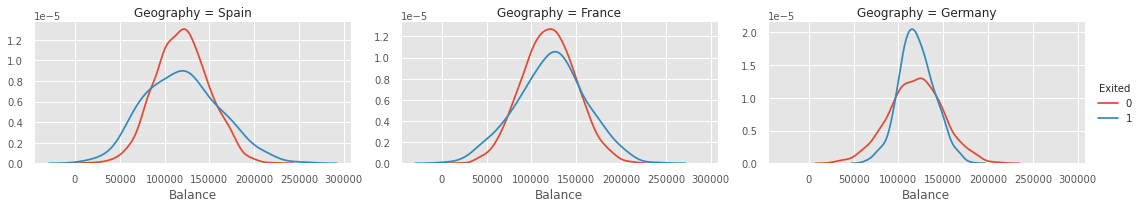

In [276]:
sns.FacetGrid(col='Geography',hue='Exited',height=3,aspect=1.7,
               data=churn.query('Balance>0.005'),
              sharey=False).map_dataframe(sns.kdeplot,'Balance').add_legend();

Como comentado, nota-se que a densidade de probabilidade de churn para clientes com `Balance`$\ge$100k e $\le$150k é muito superior quando o país é a Alemanha, comportamento oposto ao ocorrido nos demais países:

In [242]:
# densidade de probabilidade para churn=1
print('[100k-150k]: Alemanha',
     calculate_probability(churn_1.query('Geography=="Germany"'), 'Balance', 100000, 100000, 150000),
    'Demais países:',
      calculate_probability(churn_1.query('Geography!="Germany"'), 'Balance', 100000, 100000, 150000)
)

[100k-150k]: Alemanha 0.7936 Demais países: 0.2788


In [243]:
# Taxa de churn para o range com maior probabilidade
print('De um total de {} clientes no range, {} clientes tiveram evasão, onde {} ({}%) são da Alemanha.'.format(
    churn.query('100000<=Balance<=150000').shape[0],
    churn.query('100000<=Balance<=150000 and Exited==1').shape[0],
    churn.query('Geography=="Germany" and 100000<=Balance<=150000 and Exited==1').shape[0],
round(churn.query('Geography=="Germany" and 100000<=Balance<=150000 and Exited==1').shape[0]/\
    churn.query('100000<=Balance<=150000 and Exited==1').shape[0]*100,2))
     )

De um total de 3830 clientes no range, 987 clientes tiveram evasão, onde 646 (65.45%) são da Alemanha.


Aplicando um teste de associação point biserial entre a variável dependente e a segmentação para `Geography`=Germany e `Balance`$\ge$100k e $\le$150k, o resultado é uma associação ainda fraca, porém estatisticamente relevante. Pode-se, portanto, utilizar o arranjo criado como variável independente para o modelo de aprendizado de máquina.

In [296]:
# criação dos arranjos
germany_balance = np.zeros(churn.shape[0])
geography = np.array(churn['Geography'])
balance = np.array(churn['Balance'])

In [297]:
# valor 1 se Germany e 100k<=Balance<=150k
for i in range(germany_balance.shape[0]):
    if (geography[i]=='Germany') and (100000<=balance[i]<=150000):
        germany_balance[i]=1
    else:
        germany_balance[i]=germany_balance[i]

In [298]:
corr, p_value = pb(churn['Exited'], germany_balance)
corr, p_value

(0.2069250834957893, 3.774304003573907e-97)

# 2 - Engenharia de Atributos

## Seleção de atributos

- Excluir variáveis sem associação

In [294]:
churn.drop(['HasCrCard','Tenure','EstimatedSalary'], axis=1, inplace=True)

## Criação de atributos

- `Germany_Balance`

Criar variável apresentada anteriormente na análise bivariada entre `Geography`, `Balance` e `Exited`

In [299]:
churn['Germany_Balance'] = germany_balance.astype(int)

In [300]:
churn.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited,Germany_Balance
0,619,France,Female,42,0.00,1,1,1,0
1,608,Spain,Female,41,83807.86,1,1,0,0
2,502,France,Female,42,159660.80,3,0,1,0
3,699,France,Female,39,0.00,2,0,0,0
4,850,Spain,Female,43,125510.82,1,1,0,0


# 3 - Exportar df

Exportar df para ser utilizado no modelo de aprendizado de máquina.

In [301]:
churn.to_csv('churn_preprocessing.csv', header=True, index=False)

In [302]:
import os

files = os.listdir('.')
files

['.ipynb_checkpoints',
 'churn.csv',
 'Churn_Model.ipynb',
 'churn_preprocessing.csv',
 'Churn_Preprocessing.ipynb']